# Predicting exam results

In this task you will build a model predicting students' marks on the exam given their demographics and historical performance. The [data](http://archive.ics.uci.edu/ml/datasets/Student+Performance) was collected at two Portuguese schools to get a better understanding of the factors that influence students' progress.  

Preparing this data for analysis could be very time consuming so we did some preparation for you. File students_data.csv which goes along with this homework contains this dataset partially preprocessed and aggregated.

Your goal is to build the model to predict the final grade of the student (the Grade column) provided values in all other columns.

### Exploring the data

In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

Let us load the data as a pandas dataframe.

In [3]:
data = pd.read_csv("students_data.csv", sep = ";")

Now take a look at the dataset and its features:

In [4]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,guardian,traveltime,...,isMedu3,isMedu4,isFedu1,isFedu2,isFedu3,isFedu4,isReasonHome,isReasonRep,isReasonCourse,Grade
0,GP,1,17,U,LE3,1,at_home,at_home,0,2,...,0,0,0,1,0,0,1,0,0,15
1,GP,0,16,U,GT3,1,other,other,1,1,...,0,0,0,1,0,0,0,0,0,15
2,GP,1,19,U,GT3,1,at_home,other,0,1,...,0,0,1,0,0,0,0,0,1,9
3,MS,0,19,U,LE3,1,other,at_home,0,1,...,0,0,1,0,0,0,0,0,1,9
4,GP,0,18,U,LE3,1,other,other,1,1,...,0,0,1,0,0,0,0,0,1,0


In [5]:
data.dtypes

school            object
sex                int64
age                int64
address           object
famsize           object
Pstatus            int64
Mjob              object
Fjob              object
guardian           int64
traveltime         int64
studytime          int64
failures           int64
internet          object
famrel             int64
freetime           int64
goout              int64
Dalc               int64
Walc               int64
health             int64
absences           int64
isSchoolsup        int64
isFamsup           int64
isPaid             int64
isActivities       int64
isNursery          int64
isHigher           int64
isRomantic         int64
isMedu1            int64
isMedu2            int64
isMedu3            int64
isMedu4            int64
isFedu1            int64
isFedu2            int64
isFedu3            int64
isFedu4            int64
isReasonHome       int64
isReasonRep        int64
isReasonCourse     int64
Grade              int64
dtype: object

As you can see, the dataset conains plenty of information about the students. Here is the description of the features:

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
* sex - student's sex (binary: 'F' - female or 'M' - male) 
* age - student's age (numeric: from 15 to 22) 
* address - student's home address type (binary: 'U' - urban or 'R' - rural) 
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
* guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
* failures - number of past class failures (numeric: n if $1\leq n<3$, else 4) 
* internet - Internet access at home (binary: yes or no) 
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
* freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
* goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* health - current health status (numeric: from 1 - very bad to 5 - very good) 
* absences - number of school absences (numeric: from 0 to 93) 
* isSchoolsup - extra educational support (binary: 0 or 1)
* isPaid - extra paid classes within the course subject (Math or Portuguese) (binary: 0 or 1) 
* isActivities - extra-curricular activities (binary: 0 or 1) 
* isNursery - attended nursery school (binary: 0 or 1) 
* isHigher - wants to take higher education (binary: 0 or 1)
* isRomantic - with a romantic relationship (binary: 0 or 1)
* isMedu1 - mother's education is primary education (4th grade) (binary: 0 or 1)
* isMedu2 - mother's education is 5th to 9th grade (binary: 0 or 1)
* isMedu3 - mother's education is secondary education (binary: 0 or 1)
* isMedu4 - mother's education is higher education (binary: 0 or 1)
* isFedu1 - father's education is primary education (4th grade) (binary: 0 or 1)
* isFedu2 - father's education is 5th to 9th grade (binary: 0 or 1)
* isFedu3 - father's education is secondary education (binary: 0 or 1)
* isFedu4 - father's education is higher education (binary: 0 or 1)
* isReasonHome - chose the school because it was close to home (binary: 0 or 1)
* isReasonRep - chose the school because of its reputation (binary: 0 or 1)
* isReasonCourse - chose the school because of the course preferences (binary: 0 or 1)
* Grade - exam grade

### Data preprocessing

Recall that ML works with numbers only. This dataset contains few non-numerical features. Present them in the numerical form before modeling.

In [17]:
data_numerical = pd.get_dummies(data=data)

### Preparing the subsets

In order to interpret the model performance you need to split dataset into three subsets: train, cross validation and test. Leaving 20% of data for cross validation and 20% for test will be ok for this task. Also, separate `Grade` from the sets and store it in separate variables `y`. Recall that we want to train the model to predict grade. It should not be a feature.

In [28]:
train = data_numerical.sample(frac=0.6,random_state=200)
test = data_numerical.drop(train.index)
cv = test[:len(test)//2]
test = test[len(test)//2 + 1:]

train_y = train[['Grade']]
train.__delitem__('Grade')
train_set = train
cv_y = cv[['Grade']]
cv.__delitem__('Grade')
cv_set = cv
test_y = test[['Grade']]
test.__delitem__('Grade')
test_set = test

### Training linear regression

Train linear regression model on the dataset. Use the model from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [36]:
reg = LinearRegression()
reg.fit(train, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Calculate cost function for train, CV and test sets.

In [41]:
train_cost = mean_squared_error(train_y, reg.predict(train))
cv_cost = mean_squared_error(cv_y, reg.predict(cv))
test_cost = mean_squared_error(test_y, reg.predict(test))

print(train_cost, cv_cost, test_cost)

12.771688848133605 24.19631044290382 21.32491170014338


Make prediction for the train, CV and test sets using the model you have trained.

In [43]:
train_predicted = reg.predict(train)
cv_predicted = reg.predict(cv)
test_predicted = reg.predict(test)

The code below will plot the CV and test accuracy of your model.

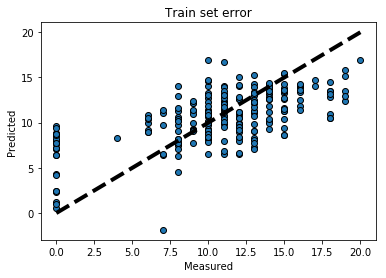

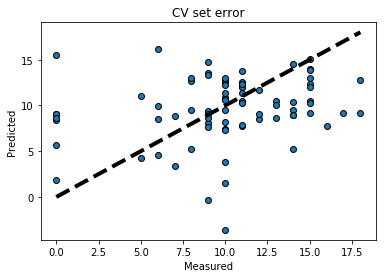

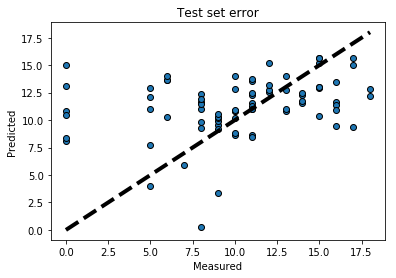

In [44]:
fig, ax = plt.subplots()
plt.scatter(train_y, train_predicted, edgecolors=(0, 0, 0))
plt.plot([np.array(train_y).min(), np.array(train_y).max()], [np.array(train_y).min(), np.array(train_y).max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Train set error')
plt.show()

fig, ax = plt.subplots() 
plt.scatter(cv_y, cv_predicted, edgecolors=(0, 0, 0))
plt.plot([np.array(cv_y).min(), np.array(cv_y).max()], [np.array(cv_y).min(), np.array(cv_y).max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('CV set error')
plt.show()

fig, ax = plt.subplots()
plt.scatter(test_y, test_predicted, edgecolors=(0, 0, 0))
plt.plot([np.array(test_y).min(), np.array(test_y).max()], [np.array(test_y).min(), np.array(test_y).max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Test set error')
plt.show()